## Arrays

#### Isomorphic

In [4]:
def isIsomorphic(s, t): 
        return [s.find(i) for i in s] == [t.find(j) for j in t]

In [5]:
s = "paper"
t = "title"

isIsomorphic(s,t)

True

In [7]:
[s.find(i) for i in s]

[0, 1, 0, 3, 4]

####   Minimum Index Sum of Two Lists

In [25]:
def findRestaurant(list1: list[str], list2: list[str]) -> list[str]:
    d = {l:i for i,l in enumerate(list1)}
    sm = {l:i+d[l] for i,l in enumerate(list2) if l in d}
    mn = min(v for v in sm.values())
    return [k for k,v in sm.items() if v == mn]

In [26]:
list1 = ["Shogun","Tapioca Express","Burger King","KFC"]
list2 = ["KFC","Shogun","Burger King"]
findRestaurant(list1, list2)

['Shogun']

#### Intersection of two arrays

In [19]:
from collections import Counter
def intersect(nums1: list[int], nums2: list[int]) -> list[int]:
        first = Counter(nums1)
        second = Counter(nums2)
        res = []
        for i in first:
            if i in second:
                res = res + [i] * min(first[i], second[i])
        return res

In [20]:
nums1 = [4,9,5]
nums2 = [9,4,9,8,4]

intersect(nums1, nums2)

[4, 9]

#### Contains duplicates in a list

In [21]:
def containsNearbyDuplicate(nums: list[int], k: int) -> bool:
        d = dict()
        
        for i,v in enumerate(nums):
            if v in d and i-d[v] <= k:
                return True
            d[v] = i
        return False

In [27]:
nums = [1,0,1,1]
k = 1
containsNearbyDuplicate(nums, k)

True

In [24]:
nums = [1,2,3,1,2,3]
k = 2
containsNearbyDuplicate(nums, k)

False

#### length of longest substring in array

In [25]:
def lengthOfLongestSubstring(s: str) -> int:
        encountered = dict()
        anchor = length = 0
        for i, c in enumerate(s):
            if c in encountered and encountered[c] >= anchor:
                print("if",anchor)
                anchor = encountered[c] + 1
                print(anchor)
            else:
                length = max(length, i + 1 - anchor)
                print("else", length)
            encountered[c] = i
            print(encountered)
        return length

In [ ]:
class Solution:
    def lengthOfLongestSubstring(self, s: str) -> int:
        charSet = set()
        l = 0
        res = 0

        for r in range(len(s)):
            while s[r] in charSet:
                charSet.remove(s[l])
                l +=1
            charSet.add(s[r])
            res = max(res, r-l +1)
        return res

In [2]:
class Solution:
    def lengthOfLongestSubstring(self, s: str) -> int:
        '''
        build a string, if we find a conflict then reset our string by removing all chars before the conflict 
        '''
        b = ''
        ans = 0
        for char in s:
            if char in b:
                b = b[b.index(char) + 1:] + char
            else:
                b += char
                ans = max(ans, len(b))
        
        return ans
    
Solution().lengthOfLongestSubstring("pwwkew")

3

In [26]:
lengthOfLongestSubstring("pwwkew")

else 1
{'p': 0}
else 2
{'p': 0, 'w': 1}
if 0
2
{'p': 0, 'w': 2}
else 2
{'p': 0, 'w': 2, 'k': 3}
else 3
{'p': 0, 'w': 2, 'k': 3, 'e': 4}
if 2
3
{'p': 0, 'w': 5, 'k': 3, 'e': 4}


3

In [14]:
lengthOfLongestSubstring("bbbbb")

1

In [15]:
lengthOfLongestSubstring("abcabcbb")

3

In [16]:
lengthOfLongestSubstring("dvdf")

3

#### 3Sum
Sum of 3 numbers equal to a target sum 0 in this case

For the main function:

Sort the input array nums.
Iterate through the array:
If the current value is greater than zero, break from the loop. Remaining values cannot sum to zero.
If the current value is the same as the one before, skip it.
Otherwise, call twoSumII for the current position i.
For twoSumII function:

Set the low pointer lo to i + 1, and high pointer hi to the last index.
While low pointer is smaller than high:
If sum of nums[i] + nums[lo] + nums[hi] is less than zero, increment lo.
If sum is greater than zero, decrement hi.
Otherwise, we found a triplet:
Add it to the result res.
Decrement hi and increment lo.
Increment lo while the next value is the same as before to avoid duplicates in the result.
Return the result res.

In [ ]:
class Solution:
    def threeSum(self, nums: List[int]) -> List[List[int]]:
        res = []
        nums.sort()
        for i in range(len(nums)):
            if nums[i] > 0:
                break
            if i == 0 or nums[i - 1] != nums[i]:
                self.twoSumII(nums, i, res)
        return res

    def twoSumII(self, nums: List[int], i: int, res: List[List[int]]):
        lo, hi = i + 1, len(nums) - 1
        while (lo < hi):
            sum = nums[i] + nums[lo] + nums[hi]
            if sum < 0:
                lo += 1
            elif sum > 0:
                hi -= 1
            else:
                res.append([nums[i], nums[lo], nums[hi]])
                lo += 1
                hi -= 1
                while lo < hi and nums[lo] == nums[lo - 1]:
                    lo += 1

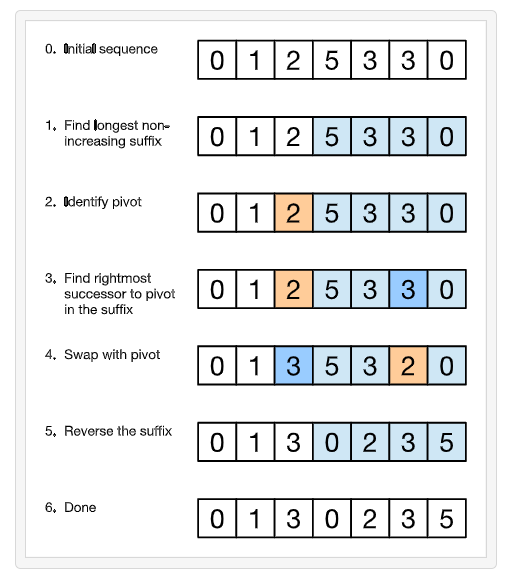

In [ ]:
class Solution:
    def nextPermutation(self, nums: List[int]) -> None:
        """
        Do not return anything, modify nums in-place instead.
        """
        i = len(nums) -1
        
        while i > 0 and nums[i-1] >= nums[i]:
            i -=1
            
        if i <= 0:
            nums[:] = nums[::-1]
        else:
            j = len(nums)-1

            while nums[j] <= nums[i-1]:
                j -=1

            nums[i-1], nums[j] = nums[j], nums[i-1]

            nums[i:] = nums[len(nums)-1: i-1 : -1]
        

In [1]:
def findMaxConsecutiveOnes(self, nums: List[int]) -> int:
        longest_sequence = 0
        left, right = 0, 0
        num_zeroes = 0

        while right < len(nums):   # while our window is in bounds
            if nums[right] == 0:    # add the right most element into our window
                num_zeroes += 1

            while num_zeroes == 2:   # if our window is invalid, contract our window
                if nums[left] == 0:    
                    num_zeroes -= 1
                left += 1

            longest_sequence = max(longest_sequence, right - left + 1)   # update our longest sequence answer
            right += 1   # expand our window

        return longest_sequence

In [29]:
def thirdMax(nums: list[int]) -> int:
        nums.sort()

        temp = list(set(nums))
        
        # sorted list when converted to set doesnot keeo 
        #the order if -ve numbers are present
        temp.sort()
        print(temp)
        if len(temp) < 3:
            return max(temp)
        else:
            return temp[-3]

In [30]:
def thirdMax(self, nums: List[int]) -> int:
        nums = list(set(nums))
        if len(nums) < 3:
            return max(nums)
        else:
            nums.remove(max(nums))
            nums.remove(max(nums))
            return max(nums)
            
        

[-1, 2, 3]


-1

In [ ]:
def findDisappearedNumbers(self, nums):
        """
        :type nums: List[int]
        :rtype: List[int]
        """
        
        # Hash table for keeping track of the numbers in the array
        # Note that we can also use a set here since we are not 
        # really concerned with the frequency of numbers.
        hash_table = {}
        
        # Add each of the numbers to the hash table
        for num in nums:
            hash_table[num] = 1
        
        # Response array that would contain the missing numbers
        result = []    
        
        # Iterate over the numbers from 1 to N and add all those
        # that don't appear in the hash table. 
        for num in range(1, len(nums) + 1):
            if num not in hash_table:
                result.append(num)
                
        return result        

#### rotate a matrix
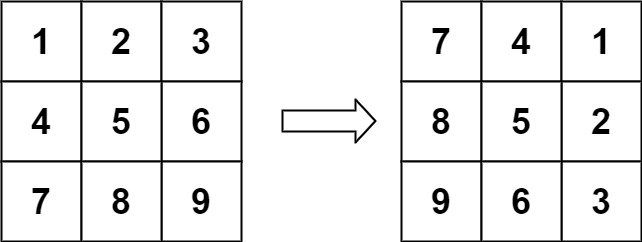
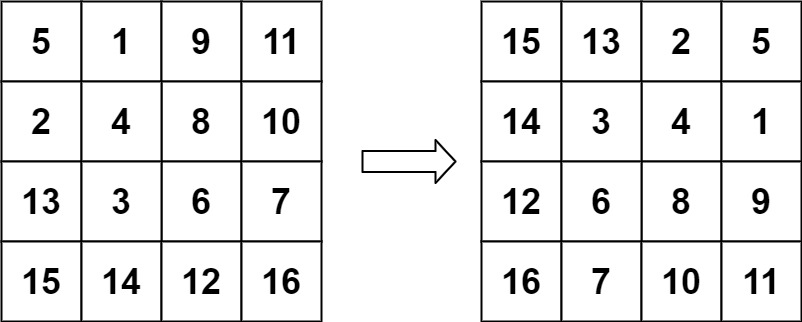
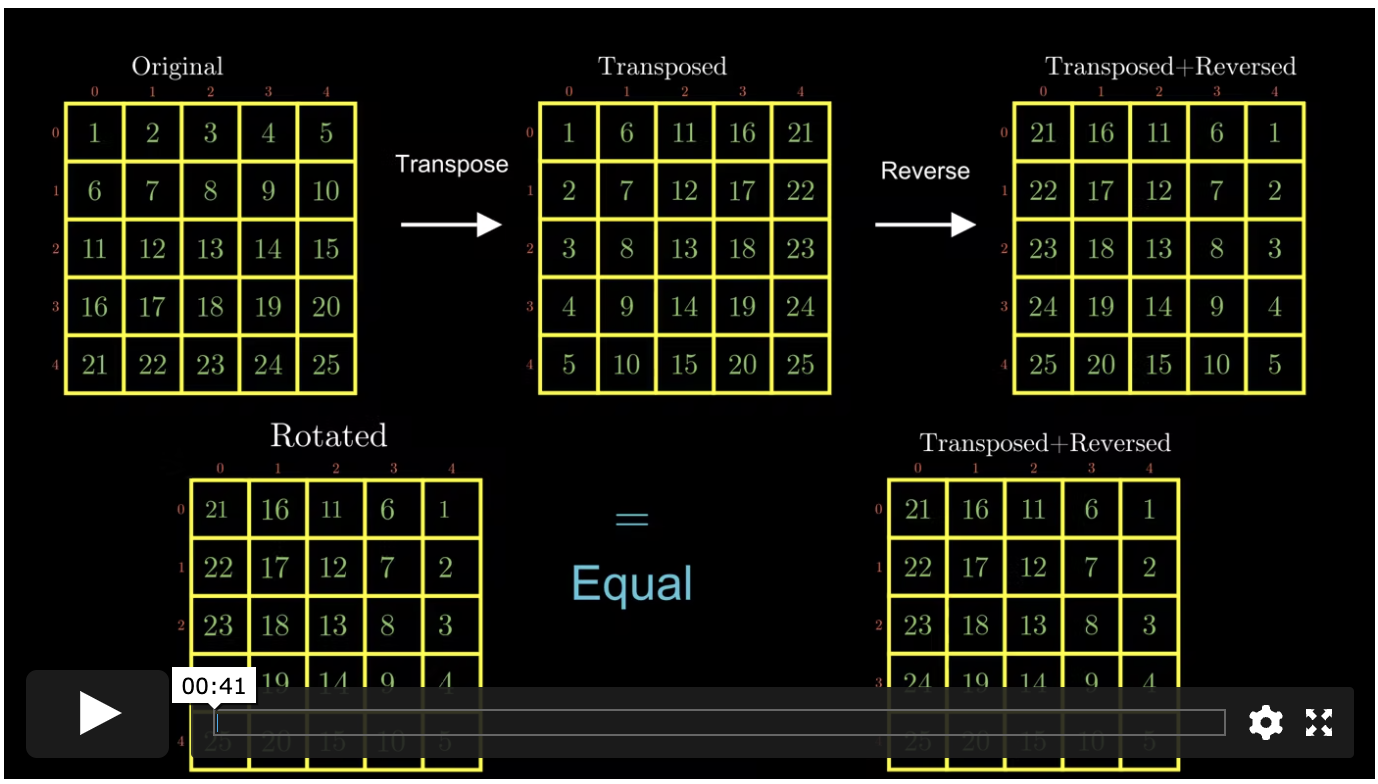

In [ ]:
class Solution:
    def rotate(self, matrix: List[List[int]]) -> None:
        self.transpose(matrix)
        self.reflect(matrix)
    
    def transpose(self, matrix):
        n = len(matrix)
        for i in range(n):
            for j in range(i + 1, n):
                matrix[j][i], matrix[i][j] = matrix[i][j], matrix[j][i]

    def reflect(self, matrix):
        n = len(matrix)
        for i in range(n):
            for j in range(n // 2):
                matrix[i][j], matrix[i][-j - 1] = matrix[i][-j - 1], matrix[i][j]


#### can jump array 

In [ ]:
def canJump(nums: list[int]) -> bool:
        max_reach, n = 0, len(nums)
        for i, x in enumerate(nums):
            if max_reach < i: return False
            if max_reach >= n - 1: return True
            max_reach = max(max_reach, i + x)

In [4]:

def canJump(nums: [int]) -> bool:
    last_position = len(nums)-1

    for i in range(len(nums)-2,-1,-1): # Iterate backwards from second to last item until the first item
        if (i + nums[i]) >= last_position: # If this index has jump count which can reach to or beyond the last position
            last_position = i # Since we just need to reach to this new index
    return last_position == 0

In [12]:
canJump([1,1,1,1,0])

True

In [6]:
canJump([3,2,1,0,4])

False

#### One plus
Input: digits = [1,2,3]
Output: [1,2,4]
Explanation: The array represents the integer 123.
Incrementing by one gives 123 + 1 = 124.
Thus, the result should be [1,2,4].

In [ ]:
def plusOne(self, digits: List[int]) -> List[int]:
        digits = [str(i) for i in digits]
        d = "".join(digits)
        d = int(d) + 1
        return [str(i) for i in str(d)]

In [1]:
digits = [1,2,3]

In [19]:
import collections
i = collections.Counter()

i["j"] -=1
i

Counter({'j': -1})

In [17]:
import collections
def minWindow(s, t):
    need = collections.Counter(t)            #hash table to store char frequency
    
    missing = len(t)                         #total number of chars we care
    start, end = 0, 0
    i = 0
    for j, char in enumerate(s, 1):          #index j from 1
        
        if need[char] > 0:
            print(char)
            missing -= 1
        print(need)
        need[char] -= 1
        print(need)
        if missing == 0:                     #match all chars
            while i < j and need[s[i]] < 0:  #remove chars to find the real start
                need[s[i]] += 1
                i += 1
            need[s[i]] += 1                  #make sure the first appearing char satisfies need[char]>0
            missing += 1                     #we missed this first char, so add missing by 1
            if end == 0 or j-i < end-start:  #update window
                start, end = i, j
            i += 1                           #update i to start+1 for next window
    return s[start:end]

In [18]:
s = "ADOBECODEBANC"
t = "ABC"

minWindow(s,t)

A
Counter({'A': 1, 'B': 1, 'C': 1})
Counter({'B': 1, 'C': 1, 'A': 0})
Counter({'B': 1, 'C': 1, 'A': 0})
Counter({'B': 1, 'C': 1, 'A': 0, 'D': -1})
Counter({'B': 1, 'C': 1, 'A': 0, 'D': -1})
Counter({'B': 1, 'C': 1, 'A': 0, 'D': -1, 'O': -1})
B
Counter({'B': 1, 'C': 1, 'A': 0, 'D': -1, 'O': -1})
Counter({'C': 1, 'A': 0, 'B': 0, 'D': -1, 'O': -1})
Counter({'C': 1, 'A': 0, 'B': 0, 'D': -1, 'O': -1})
Counter({'C': 1, 'A': 0, 'B': 0, 'D': -1, 'O': -1, 'E': -1})
C
Counter({'C': 1, 'A': 0, 'B': 0, 'D': -1, 'O': -1, 'E': -1})
Counter({'A': 0, 'B': 0, 'C': 0, 'D': -1, 'O': -1, 'E': -1})
Counter({'A': 1, 'B': 0, 'C': 0, 'D': -1, 'O': -1, 'E': -1})
Counter({'A': 1, 'B': 0, 'C': 0, 'D': -1, 'E': -1, 'O': -2})
Counter({'A': 1, 'B': 0, 'C': 0, 'D': -1, 'E': -1, 'O': -2})
Counter({'A': 1, 'B': 0, 'C': 0, 'E': -1, 'D': -2, 'O': -2})
Counter({'A': 1, 'B': 0, 'C': 0, 'E': -1, 'D': -2, 'O': -2})
Counter({'A': 1, 'B': 0, 'C': 0, 'D': -2, 'O': -2, 'E': -2})
Counter({'A': 1, 'B': 0, 'C': 0, 'D': -2, 'O': -2

'BANC'